## Investment Analysis Assignment

Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.


# Checkpoint 1: Data Cleaning 1

In [1]:
# importing the Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the csv file and using the encoding='ISO-8859-1' to avoid pandas encoding error while loading data
#companies=pd.read_csv("companies.csv")
#rounds2=pd.read_csv("rounds2.csv")
# companies=pd.read_csv("companies.csv",encoding='ISO-8859-1')
# rounds2=pd.read_csv("rounds2.csv",encoding='ISO-8859-1')

# using Palmos encoding for reading csv files, so that there will be no special characters in dataframe
companies=pd.read_csv("companies.csv",encoding='Palmos')
rounds2=pd.read_csv("rounds2.csv",encoding='Palmos')

In [3]:
# Displaying the some rows of data
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
# Checking the structure of data

print(companies.info())
print("\n")
print("Number of rows and columns")
print(companies.shape)
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None


Number of rows and columns
(66368, 10)


In [6]:

print(rounds2.info())
print("\n")
print("Number of rows and columns")
print(rounds2.shape)
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


Number of rows and columns
(114949, 6)


### Getting the unique counts in rounds2 and companies

In [7]:
companies.permalink.nunique()

66368

In [8]:
rounds2.company_permalink.nunique()

90247

`i can see the rounds2 unique count is more than companies count, so generally this can be a data issue. in first few records in companies i can see the uppercase letter whereas same company name is in lower case in rounds2, so i assume that people might has saved the names with upper case or lower case, so I will convert the names to lower case and check the count again.`

In [9]:
# converting the upper case letter to lower case if any 
companies['permalink']=companies['permalink'].str.lower()

In [10]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [11]:
companies.permalink.nunique()

66368

In [12]:
rounds2.company_permalink.nunique()

66368

### Below encoding technique we can used to solve the encoding issues, when we are not using Palmos encoding.

In [13]:
# checking the company values which are  not in rounds2
# rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

In [14]:
# checking the encoding type
#import chardet

#data = open('rounds2.csv', 'rb').read()
#result = chardet.detect(data)
#char = result['encoding']
#print(char)

In [15]:
# trying the Windows-1254 encoding, but it gives an error.
#companies=pd.read_csv("companies.csv",encoding='Windows-1254')
#rounds2=pd.read_csv("rounds2.csv",encoding='Windows-1254')


In [16]:
# after serching on google i found out the way to deal with this encdoing issue https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe
#rounds2['company_permalink']=rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')

In [17]:
# checking the unique count again
#rounds2.company_permalink.nunique()

In [18]:
# will apply the same encoding method on comapines data also
#companies['permalink']=companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')

### Continuing with further analysis. 

In [19]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [20]:
# merging the two columns
master_frame=pd.merge(companies,rounds2,how='inner',left_on='permalink',right_on='company_permalink')

In [21]:
print(master_frame.info())
print("\n")
print("checking the number of rows and columns")
print(master_frame.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
None


checking the number of rows an

In [22]:
# permalink and company_permalink have the same value so dropping the company_permalink.
master_frame=master_frame[['permalink','name','homepage_url','category_list','status','country_code','state_code','region','city','founded_at','funding_round_permalink','funding_round_type','funding_round_code','funded_at','raised_amount_usd']]

In [23]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [24]:
# checking the columns types
master_frame.dtypes

permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [25]:
# checking the missing values
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [26]:
# finding the % of missing values in each columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [27]:
# dropping the columns which is not useful for analysis and funding_round_code column which has the more missing values
master_frame=master_frame.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'],axis=1)

In [28]:
# checking missing values again
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

`we have missing values in raised_amount_usd,category_list and in country_code, but these are important columns so we need to treat them very carefully.`

In [29]:
# checking the data in raised_amount_usd columns
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [30]:
# doing formatting so the results can be displayed in readable format
pd.options.display.float_format = '{:.2f}'.format

In [31]:
# checking the data in raised_amount_usd columns again
master_frame['raised_amount_usd'].describe()

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
25%          322500.00
50%         1680511.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

`As raised_amount_usd is the imp column i don’t want to replace missing value with either with mean or with median. plus i see data is skewed, and it’s not recommended to impute the values when data is skewed. Plus, i have lot of data so it’s ok to drop some records`

In [32]:
# Dropping the missing rows 
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [33]:
# checking again if we have missing values again
master_frame['raised_amount_usd'].isnull().sum()

0

In [34]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

In [35]:
# checking the types of each column
master_frame.dtypes

permalink                   object
name                        object
category_list               object
status                      object
country_code                object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [36]:
# coverting the country code column as category type
country_code=master_frame['country_code'].astype('category')

In [37]:
master_frame.dtypes

permalink                   object
name                        object
category_list               object
status                      object
country_code                object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [38]:
master_frame['country_code'].value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
SEN        1
OMN        1
QAT        1
HND        1
BLM        1
Name: country_code, Length: 134, dtype: int64

` we have usa is most common values so if we want we can impute the missing records with usa but we have enough rows and only 6 % values is missing, i will drop the rows where category is missing.`

In [39]:
master_frame=master_frame[~master_frame['country_code'].isnull()]

In [40]:
# checking again the % missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                 0.00
name                      0.00
category_list             0.65
status                    0.00
country_code              0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

` going to remove the missing values in category list, since only less number of missing rows left`

In [41]:
master_frame=master_frame[~master_frame['category_list'].isnull()]

In [42]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

In [43]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


` now we have no missing values, and data looks clean. now its fine to proceed with our analysis`

# Checkpoint 2: Funding Type Analysis

In [44]:
master_frame.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00


In [45]:
# selecting only four important funding types that needed 
investment_types=master_frame[(master_frame.funding_round_type=='venture') | (master_frame.funding_round_type=='angel') | (master_frame.funding_round_type=='seed') | (master_frame.funding_round_type=='private_equity')]


In [46]:
investment_types.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=['mean','median'])


mean                                         median  \
funding_round_type     angel private_equity      seed     venture     angel   
raised_amount_usd  971573.89    73938486.28 747793.68 11724222.69 414906.00   

                                                        
funding_round_type private_equity      seed    venture  
raised_amount_usd     20000000.00 300000.00 5000000.00

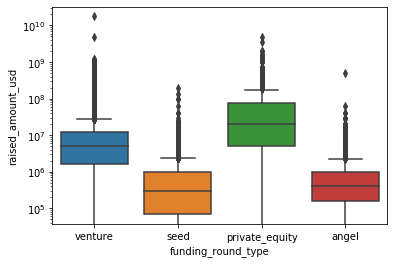

In [47]:
# comparing to see how the stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=investment_types)
plt.yscale('log')
plt.show()

# Checkpoint 3: Country Analysis

In [48]:
# selecting only venture investment type
master_frame=investment_types[investment_types['funding_round_type']=='venture']

In [49]:
# calculating the country wise raised amount
country_wise_amount=master_frame.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False)

In [50]:
country_wise_amount

country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
            ...      
MCO         657000.00
SAU         500000.00
CMR         359561.00
GTM         300000.00
MMR         200000.00
Name: raised_amount_usd, Length: 97, dtype: float64

In [51]:
# selecting only top 9 countries
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]

top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
FRA     7226851352.00
ISR     6854350477.00
DEU     6306921981.00
JPN     3167647127.00
Name: raised_amount_usd, dtype: float64

In [52]:
top9

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00
...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.00
114923,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.00
114934,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00
114936,/organization/zystor,Zystor,Biotechnology,acquired,USA,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.00


`Top 3 engligh speaking countries are USA, GBR and IND`

In [53]:
master_frame=master_frame[(master_frame['country_code']=='USA') | (master_frame['country_code']=='GBR') | (master_frame['country_code']=='IND')]

# Checkpoint 4: Sector Analysis 1

In [54]:
master_frame.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00


In [55]:
master_frame['category_list']

0                                    Media
10                               Analytics
11                               Analytics
12                               Analytics
22        Apps|Cable|Distribution|Software
                        ...               
114920                       Biotechnology
114922                       Biotechnology
114923                       Biotechnology
114934                          E-Commerce
114936                       Biotechnology
Name: category_list, Length: 38803, dtype: object

In [56]:
# extracting the first value separated by a pipe (vertical bar |)
master_frame['primary_sector']=master_frame['category_list'].apply(lambda x: x.split("|")[0])

In [57]:
# converting the upper case to lower case
master_frame['primary_sector']=master_frame['primary_sector'].str.lower()

In [58]:
master_frame

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,apps
...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.00,biotechnology
114922,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.00,biotechnology
114923,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.00,biotechnology
114934,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00,e-commerce


In [59]:
# loading the mapping file
mapping=pd.read_csv("mapping.csv")

In [60]:
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [61]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [62]:
# dropping the missing values
mapping=mapping[~mapping['category_list'].isnull()]
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [63]:
# converting the letter to lower case
mapping['category_list']=mapping['category_list'].str.lower()
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,wholesale,0,0,0,0,0,0,0,1,0
684,wine and spirits,0,0,0,1,0,0,0,0,0
685,wireless,0,0,0,1,0,0,0,0,0
686,women,0,0,0,0,0,0,0,1,0


In [64]:
# checking the unique counts
mapping['category_list'].nunique()

687

In [65]:
master_frame['primary_sector'].nunique()

563

` there are more records in mapping file, needs to do the investaigation. `

In [66]:
# dropping the category_list column in master_frame
master_frame=master_frame.drop('category_list',axis=1)
master_frame.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,analytics


In [67]:
# checking the values which is not in master_frame
mapping[~mapping['category_list'].isin(master_frame['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


` looks something strange in words spellings, 0 is appearing at place of na in words. `

In [68]:
# converting the 0 to na
mapping['category_list']=mapping['category_list'].apply(lambda x: x.replace('0','na'))

In [69]:
# using melt() function to unpivot the table.

mapping=pd.melt(mapping,value_vars =['Manufacturing','Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],id_vars=['category_list'])


In [70]:
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
6,advanced materials,Manufacturing
14,agriculture,Manufacturing


In [71]:
# checking the values which is not in primary_sector 
mapping[~mapping['category_list'].isin(master_frame['primary_sector'])]

,category_list,main_sector
103,civil engineers,Manufacturing
263,farmers market,Manufacturing
282,fmcg,Manufacturing
320,handmade,Manufacturing
458,mobile software tools,Manufacturing
...,...,...
5424,social news,"Social, Finance, Analytics, Advertising"
5425,social recruiting,"Social, Finance, Analytics, Advertising"
5426,social television,"Social, Finance, Analytics, Advertising"
5427,social travel,"Social, Finance, Analytics, Advertising"


In [72]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 5471
Data columns (total 2 columns):
category_list    687 non-null object
main_sector      687 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [73]:
# checking the primary_sector which is not in category_list
master_frame[~master_frame['primary_sector'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
20328,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,operating,USA,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.00,natural gas uses
22940,/organization/consensus-point,Consensus Point,operating,USA,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,19-04-2011,788374.00,enterprise 2.0
22942,/organization/consensus-point,Consensus Point,operating,USA,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,18-07-2012,2600000.00,enterprise 2.0
28541,/organization/dolores-speech-products,Dolores Speech Products,operating,USA,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.00,adaptive equipment
35278,/organization/fia-formula-e,FIA Formula E,closed,GBR,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.00,racing
36012,/organization/five-below,Five Below,ipo,USA,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.00,specialty retail
36291,/organization/flexport,Flexport,operating,USA,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,06-08-2015,20000000.00,enterprise 2.0
43506,/organization/healthtell,HealthTell,operating,USA,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.00,biotechnology and semiconductor
51816,/organization/justinmind,Justinmind,operating,USA,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.00,rapidly expanding
70078,/organization/omega-point-research,Omega Point Research,closed,USA,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.00,product search


In [74]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
primary_sector             38803 non-null object
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


In [75]:
# merging the master frame with mapping
master_frame=pd.merge(master_frame,mapping,how='inner',left_on='primary_sector',right_on='category_list')

In [76]:
master_frame

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list,main_sector
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,media,Entertainment
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,media,Entertainment
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,media,Entertainment
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,media,Entertainment
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
38783,/organization/yapta,Yapta,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.00,tracking,tracking,Others
38784,/organization/yapta,Yapta,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.00,tracking,tracking,Others
38785,/organization/yapta,Yapta,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.00,tracking,tracking,Others
38786,/organization/ziftit,Ziftit,closed,USA,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.00,gift registries,gift registries,Others


In [77]:
# dropping the category_list since this same as is primary_sector
master_frame=master_frame.drop('category_list',axis=1)

In [78]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 10 columns):
permalink                  38788 non-null object
name                       38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


# Checkpoint 5: Sector Analysis 2

In [79]:
# Creating a data frames D1 for USA containing the observation.
D1=master_frame[(master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000) & (master_frame['country_code']=='USA')]

In [80]:
# Creating the seprate columns count_of_investments and total_amount_invested
D1['count_of_investments'] = D1.groupby(['main_sector'])['raised_amount_usd'].count
D1['total_amount_invested'] = D1.groupby(D1['main_sector'])['raised_amount_usd'].sum


C:\Users\yadavad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yadavad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
# Creating a data frames D2 for GBR containing the observation.
# Creating the seprate columns count_of_investments and total_amount_invested.
D2=master_frame[(master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000) & (master_frame['country_code']=='GBR')]

D2['count_of_investments'] = D2.groupby(['main_sector'])['raised_amount_usd'].count
D2['total_amount_invested'] = D2.groupby(D1['main_sector'])['raised_amount_usd'].sum


C:\Users\yadavad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\yadavad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
# Creating a separate data frames D3 for IND containing the observation.
# Creating the seprate columns count_of_investments and total_amount_invested.
D3=master_frame[(master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000) & (master_frame['country_code']=='IND')]

D3['count_of_investments'] = D3.groupby(['main_sector'])['raised_amount_usd'].count
D3['total_amount_invested'] = D3.groupby(D1['main_sector'])['raised_amount_usd'].sum


C:\Users\yadavad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\yadavad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12063
621
328


In [84]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107757097294.0
5379078691.0
2949543602.0


In [85]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1.groupby(['main_sector'])['count_of_investments'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: count_of_investments, dtype: int64

In [86]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2.groupby(['main_sector'])['count_of_investments'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: count_of_investments, dtype: int64

In [87]:
#Top sector, second-top, third-top for D3 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3.groupby(['main_sector'])['count_of_investments'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: count_of_investments, dtype: int64

In [88]:
#For point 3 (top sector count-wise), which company received the highest investment
D1[D1.main_sector == "Others"].groupby(['permalink','name'])[['raised_amount_usd']].sum().sort_values(by = 'raised_amount_usd', ascending = False).head(5)

,,raised_amount_usd
permalink,name,
/organization/virtustream,Virtustream,64300000.00
/organization/capella,Capella Photonics,54968051.00
/organization/airtight-networks,AirTight Networks,54201907.00
/organization/decarta,deCarta,52100000.00
/organization/black-duck-software,Black Duck Software,51000000.00


In [89]:
#For point 4 (second top sector count-wise), which company received the highest investment
D1[D1.main_sector == "Social, Finance, Analytics, Advertising"].groupby(['permalink','name'])[['raised_amount_usd']].sum().sort_values(by = 'raised_amount_usd', ascending = False).head(5)

,,raised_amount_usd
permalink,name,
/organization/shotspotter,SST Inc. (Formerly ShotSpotter),67933006.00
/organization/demandbase,Demandbase,63000000.00
/organization/intacct,Intacct,61800000.00
/organization/netbase,NetBase Solutions,60600000.00
/organization/lotame,Lotame,59700000.00


In [90]:
#For point 3 (top sector count-wise), which company received the highest investment
D2[D2.main_sector == "Others"].groupby(['permalink','name'])[['raised_amount_usd']].sum().sort_values(by = 'raised_amount_usd', ascending = False).head(5)

,,raised_amount_usd
permalink,name,
/organization/electric-cloud,Electric Cloud,37000000.00
/organization/sensage,SenSage,36250000.00
/organization/enigmatic,Enigmatec,32500000.00
/organization/silverrail-technologies,SilverRail Technologies,29000000.00
/organization/opencloud,OpenCloud,27972766.00


In [91]:
#For point 4 (second top sector count-wise), which company received the highest investment
D2[D2.main_sector == "Social, Finance, Analytics, Advertising"].groupby(['permalink','name'])[['raised_amount_usd']].sum().sort_values(by = 'raised_amount_usd', ascending = False).head(5)

,,raised_amount_usd
permalink,name,
/organization/celltick-technologies,Celltick Technologies,37500000.00
/organization/mythings,myThings,34000000.00
/organization/zopa,Zopa,32900000.00
/organization/imagini,VisualDNA,28550000.00
/organization/marketinvoice,MarketInvoice,25553007.00


In [92]:
#For point 3 (top sector count-wise), which company received the highest investment
D3[D3.main_sector == "Others"].groupby(['permalink','name'])[['raised_amount_usd']].sum().sort_values(by = 'raised_amount_usd', ascending = False).head(5)

,,raised_amount_usd
permalink,name,
/organization/firstcry-com,FirstCry.com,39000000.00
/organization/myntra,Myntra,38000000.00
/organization/commonfloor,CommonFloor,32900000.00
/organization/pepperfry-com,Pepperfry.com,28000000.00
/organization/itzcash-card-ltd,ItzCash Card Ltd.,25000000.00


In [93]:
#For point 4 (second top sector count-wise), which company received the highest investment
D3[D3.main_sector == "Social, Finance, Analytics, Advertising"].groupby(['permalink','name'])[['raised_amount_usd']].sum().sort_values(by = 'raised_amount_usd', ascending = False).head(5)

,,raised_amount_usd
permalink,name,
/organization/manthan-systems,Manthan Systems,50700000.00
/organization/komli-media,Komli Media,28000000.00
/organization/shopclues-com,ShopClues.com,25000000.00
/organization/intarvo,inTarvo,21900000.00
/organization/grameen-financial-services,Grameen Financial Services,21556050.00


# Checkpoint 6: Plots

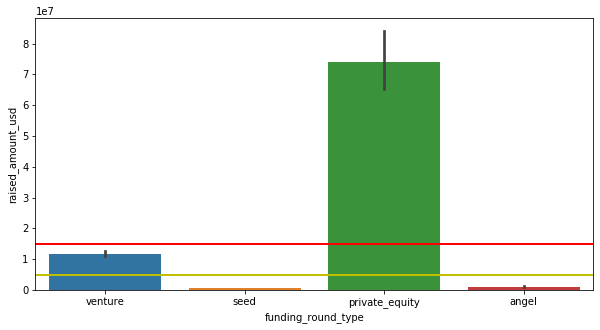

In [94]:
# plotting the fraction of total investments in angel, venture, seed, and private
plt.figure(figsize=(10, 5))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=investment_types)
plt.axhline(y=5000000, linewidth=2, color = 'y')
plt.axhline(y=15000000, linewidth=2, color = 'r')
plt.show()

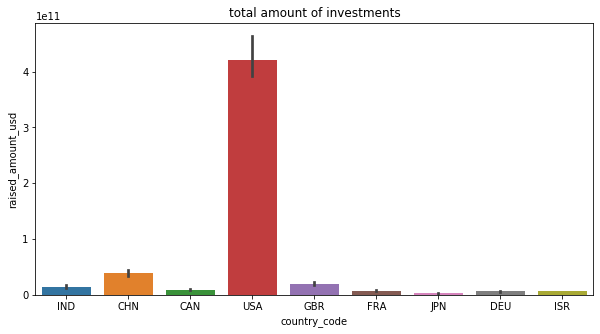

In [95]:
# Plotting top 9 country_code along with total amount of investments

plt.figure(figsize=(10, 5))
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("total amount of investments")
plt.show()

In [96]:
# creating D1,D2 and D3 data frames which will conation only top 3 sector
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D1

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,count_of_investments,total_amount_invested
47,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
57,/organization/accelerated-vision-group,Accelerated Vision Group,operating,USA,/funding-round/efc17c623b56a27ee73dca0f0155def3,venture,21-05-2012,6000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
59,/organization/accelops,AccelOps,operating,USA,/funding-round/c521b592ec7c69178447aa7242d90995,venture,01-10-2007,7000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
68,/organization/adaptive-insights,Adaptive Insights,operating,USA,/funding-round/63bca9b5f18393be1880bafb909c0767,venture,22-01-2008,14000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
72,/organization/adaptive-insights,Adaptive Insights,operating,USA,/funding-round/81a83b315bcf2e6e67592487249cbdb4,venture,01-03-2007,7500000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
...,...,...,...,...,...,...,...,...,...,...,...,...
38766,/organization/thredhq,Thredhq,operating,USA,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,18-09-2013,5000000.00,social + mobile + local,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38771,/organization/wizrocket-technologies,CleverTap,operating,USA,/funding-round/195738852853780cc8f1220ba6fb761d,venture,03-08-2015,8000000.00,consumer behavior,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38775,/organization/user-interface,User Interface,operating,USA,/funding-round/ade267714c6ee533323f46a25b2db237,venture,24-01-2001,8250000.00,user interface,Others,<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38777,/organization/washio,Washio,operating,USA,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,09-06-2014,10500000.00,service industries,Others,<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...


In [97]:
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
D2

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,count_of_investments,total_amount_invested
91,/organization/aihit,aiHit,acquired,GBR,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,07-10-2011,5500000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
219,/organization/brandwatch,Brandwatch,operating,GBR,/funding-round/09f7932220728f0083982db2fced0518,venture,15-03-2012,6000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
435,/organization/digital-shadows,Digital Shadows,operating,GBR,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,11-02-2015,8000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
443,/organization/duedil,DueDil,operating,GBR,/funding-round/05a71740dfbef5f6cb3d2689d8a7b573,venture,12-04-2013,5000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
645,/organization/intent-hq,Intent HQ,operating,GBR,/funding-round/6034decdb9ab2fe0d9d5e0372054712d,venture,01-05-2014,8009622.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
...,...,...,...,...,...,...,...,...,...,...,...,...
38670,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/0ec759962079a8997eb1632d6c1a769b,venture,23-12-2010,5005659.00,property management,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38671,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.00,property management,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38734,/organization/yoyo,Yoyo Wallet,operating,GBR,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,15-04-2015,10000000.00,loyalty programs,Others,<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38757,/organization/stingray-geophysical,Stingray Geophysical,operating,GBR,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,23-03-2006,11460000.00,gas,Cleantech / Semiconductors,<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...


In [98]:
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]
D3

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,count_of_investments,total_amount_invested
454,/organization/eka-software-solutions,Eka Software Solutions,operating,IND,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,01-01-2005,6000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
455,/organization/eka-software-solutions,Eka Software Solutions,operating,IND,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,01-01-2009,10000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
723,/organization/loginext-solutions,LogiNext Solutions,operating,IND,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,22-09-2015,10000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
741,/organization/manthan-systems,Manthan Systems,operating,IND,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,01-03-2007,5700000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
742,/organization/manthan-systems,Manthan Systems,operating,IND,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,09-12-2009,15000000.00,analytics,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
...,...,...,...,...,...,...,...,...,...,...,...,...
38233,/organization/easylink,EasyLink,ipo,IND,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,13-04-2006,5400000.00,web design,"News, Search and Messaging",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38341,/organization/razorpay,Razorpay,operating,IND,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,27-10-2015,9000000.00,fintech,"Social, Finance, Analytics, Advertising",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38400,/organization/just-dial,Just Dial,closed,IND,/funding-round/d15d2e445d216378e134d25520f32ba0,venture,06-06-2011,10000000.00,local search,"News, Search and Messaging",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...
38556,/organization/matrimony-com,Matrimony.com,operating,IND,/funding-round/64a9bc96bdc28e9974437636319293b8,venture,06-02-2008,11750000.00,classifieds,"News, Search and Messaging",<bound method SeriesGroupBy.count of <pandas.c...,<bound method GroupBy.sum of <pandas.core.grou...


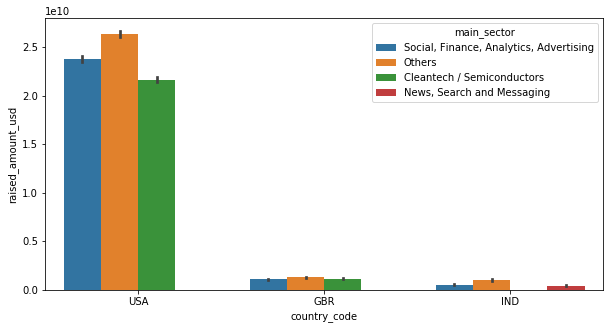

In [99]:
# Plotting the number of investments in the top 3 sectors of the top 3 countries
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(10, 5))
sns.barplot(y='raised_amount_usd', x='country_code', hue="main_sector", data=result, estimator=np.sum)
plt.show()

# Conclusions

` Spark Fund should consider Venture fund type for investment in the USA, United Kingdom and India countries, and should invest in above Top 3 sectors. `